In [27]:
%reset -f
import numpy as np
from landlab import RasterModelGrid
from landlab.components.overland_flow import OverlandFlow
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
colors = [(0,0.2,1,i) for i in np.linspace(0,1,3)]
cmap = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=10)

In [28]:
#Define grid
grid = RasterModelGrid((100, 100), xy_spacing=1.)

#Pointer to topographic elevation
z = np.zeros(100*100)
#Pointer to water depth
h = np.zeros(100*100)

#Cast values to Z
z = grid.node_y + np.abs(grid.node_x-50)
z = grid.add_field('topographic__elevation', z, at='node')

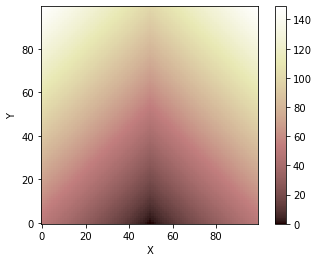

In [29]:
imshow_grid(grid,'topographic__elevation')

In [30]:
#Cast water depth values
bools = (grid.node_y > 80) * (grid.node_y < 90) * (grid.node_x < 20) * (grid.node_x > 5)
h[bools] = 10
h = grid.add_field('surface_water__depth', h, at='node')

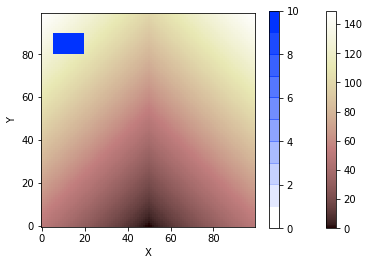

In [31]:
imshow_grid(grid,'topographic__elevation')
imshow_grid(grid,'surface_water__depth',cmap=cmap)

In [32]:
#Call overland flow model
of = OverlandFlow(grid, steep_slopes=True)
of.run_one_step()

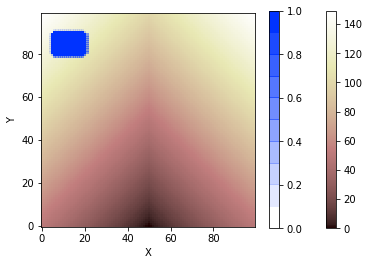

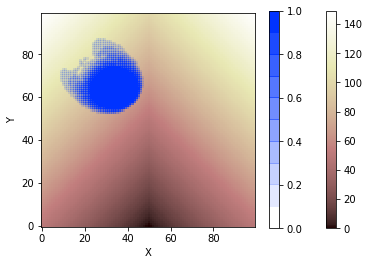

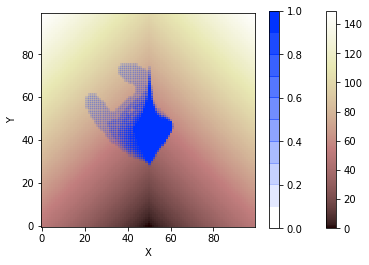

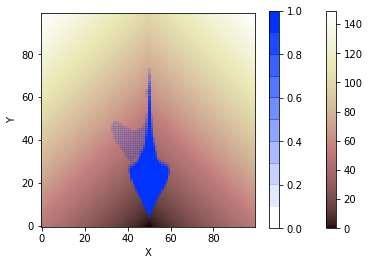

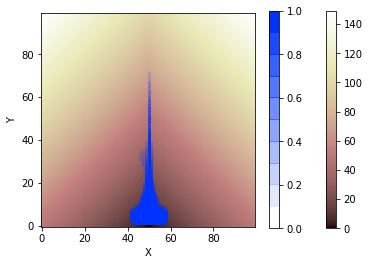

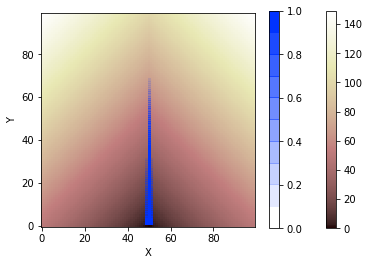

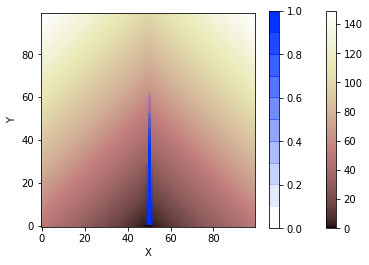

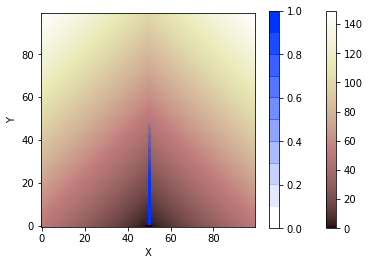

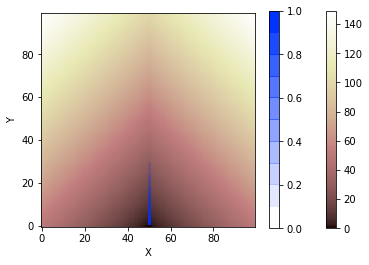

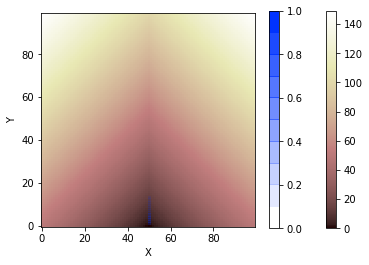

In [33]:
for i in range(1000):
    of.run_one_step()
    
    if i%100==0:
        imshow_grid(grid,'topographic__elevation')
        imshow_grid(grid,'surface_water__depth',limits=(0,1),cmap=cmap)
        plt.show()